In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
sns.set(style="darkgrid")
%matplotlib inline
from bidi.algorithm import get_display
from arabic_reshaper import reshape
import pickle 

In [4]:
def display_map(dic,path,name,font_color):
    regions = gpd.read_file("GIS Files/iran.shp")
    dic_regions = {
      "Alborz":"البرز",
      "Ardabil":"اردبیل",
      "Bushehr":"بوشهر",
      "Chahar Mahaal and Bakhtiari":"چهارمحال بختیاری",
      "East Azarbaijan":"آذربایجان شرقی",
      "Isfahan":"اصفهان",
      "fars":"فارس",
      "Gilan":"گیلان",
      "Golestan":"گلستان",
      "Hamedan":"همدان",
      "Hormozgan":"هرمزگان",
      "Ilam":"ایلام",
      "Kerman":"کرمان",
      "Kermanshah":"کرمانشاه",
      "North Khorasan":"خراسان شمالی",
      "Razavi Khorasan":"خراسان رضوی",
      "South Khorasan":"خراسان جنوبی",
      "Khuzestan":"خوزستان",
      "Kohgiluyeh and Boyer-Ahmad":"کهکیلویه و بویراحمد",
      "Kurdistan":"کردستان",
      "Lorestan":"لرستان",
      "Markazi":"مرکزی",
      "Mazandaran":"مازندران",
      "Qazvin":"قزوین",
      "Qom":"قم",
      "Semnan":"سمنان",
      "Sistan and Baluchistan":"سیستان و بلوچستان",
      "Tehran":"تهران",
      "West Azarbaijan":"آذربایجان غربی",
      "Yazd":"یزد",
      "Zanjan":"زنجان"
    }
    regions["Name_12_13"] = regions["Name_12_13"].apply(lambda x: dic_regions[x])
    regions["price"] = regions["Name_12_13"].apply(lambda x:dic[x] if x in dic.keys() else 0)
    regions["Name_12_13"] = regions["Name_12_13"].apply(lambda x: get_display(reshape(x)))
  #colors = ['Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'crest', 'crest_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'flare', 'flare_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'icefire', 'icefire_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma']
    colors = ["Purples"]
    for color in colors:
        fig, ax = plt.subplots(1, figsize=(20,15))
        ax.axis('off')
        ax.set_title(get_display(reshape(name)), fontdict={'fontsize': '34', 'fontweight' : '3'},color=font_color)
        color = color
        vmin, vmax = 0, 231
        sm = plt.cm.ScalarMappable(cmap=color, norm=plt.Normalize(vmin=0, vmax=231))
        sm._A = []
        cbar = fig.colorbar(sm,shrink=0.5)
        cbar.ax.tick_params(labelsize=12)
        regions.plot('price', cmap=color, linewidth=0.8,ax=ax, edgecolor='0.8', figsize=(15,15))

    regions['coords'] = regions['geometry'].apply(lambda x: x.representative_point().coords[:])
    regions['coords'] = [coords[0] for coords in regions['coords']]

    for idx, row in regions.iterrows():
        ax.annotate(text=row['Name_12_13'], xy=row['coords'],horizontalalignment='center',fontsize='small',color="red")
    fig.savefig(path,bbox_inches='tight',dpi=600)

C:\Users\Arian_Gh\AppData\Local\Temp\ipykernel_8036\2465642011.py:49: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  cbar = fig.colorbar(sm,shrink=0.5)


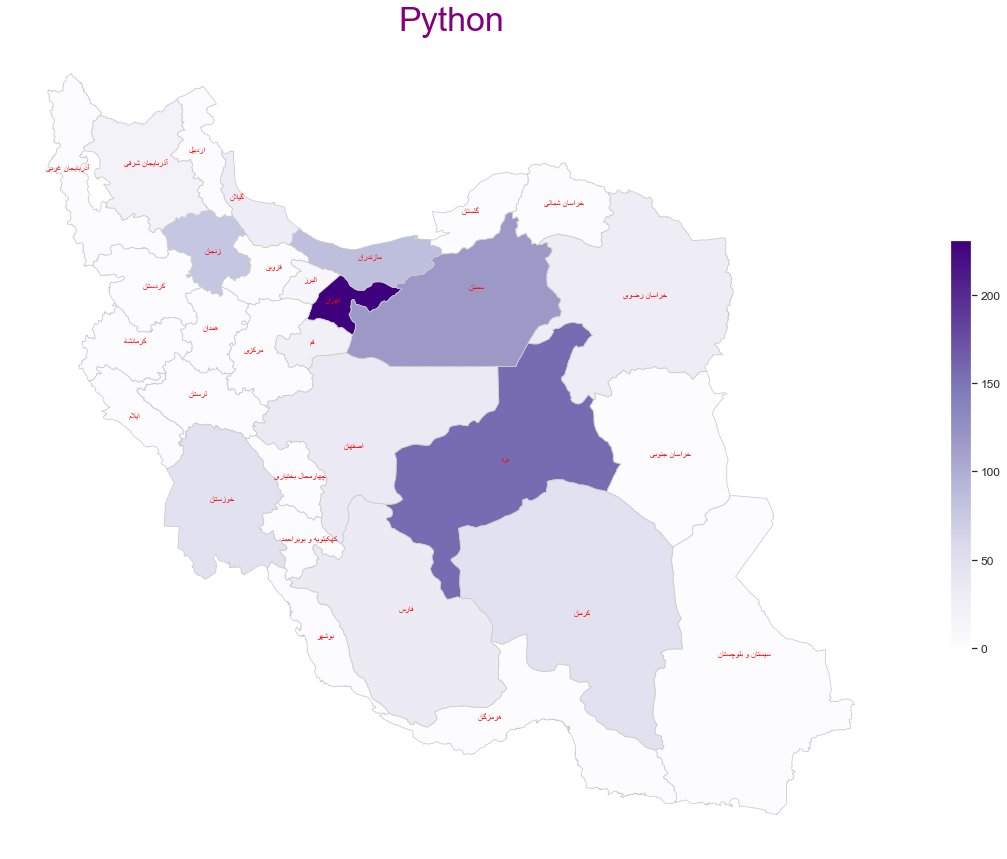

In [5]:
with open("dic_Back_end","rb") as f:
    dic_Back_end = pickle.load(f)
with open("dic_Python","rb") as f:
    dic_Python = pickle.load(f)
with open("dic_Javascript","rb") as f:
    dic_Javascript = pickle.load(f)
with open("dic_Front-end","rb") as f:
    dic_Front_end = pickle.load(f)
display_map(dic_Python,"Python.png","Python","Purple")